# **Regression**

***Title:***  **Analysis of Quantitative Economic Indicators in Global Economy Dataset**


***Problem Statement:***
The numeric columns in the dataset represent key economic indicators for multiple countries over time. These include exchange rates, population, GDP, GNI, and sector-wise economic contributions. Understanding the relationships and trends within these numeric attributes can reveal insights into global economic dynamics, sector-specific growth, and cross-country comparisons. The project aims to analyze these numeric columns to derive actionable insights.

***Objective:***
To analyze and interpret the numeric attributes of the dataset to identify trends, correlations, anomalies, and relationships across countries, years, and sectors. The goal is to uncover key drivers of economic performance and provide recommendations for policy, investment, or operational strategies.

**Why Ridge Regression is chosen for this project?**

Addressing Multicollinearity: Ridge Regression handles multicollinearity effectively by adding a penalty term, which is essential for datasets in the finance domain where indicators like GDP, GNI, and trade values are highly correlated.

Stability in Predictions: Financial datasets often have numerous features with varying scales. Ridge Regression ensures stable and reliable predictions by regularizing the model, making it ideal for long-term economic insights.

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   CountryID                                                                                 10512 non-null  int64  
 1   Country                                                                                   10512 non-null  object 
 2   Year                                                                                      10512 non-null  int64  
 3   AMA exchange rate                                                                         10512 non-null  float64
 4   IMF based exchange rate                                                                   10512 non-null  float64
 5   Population                         

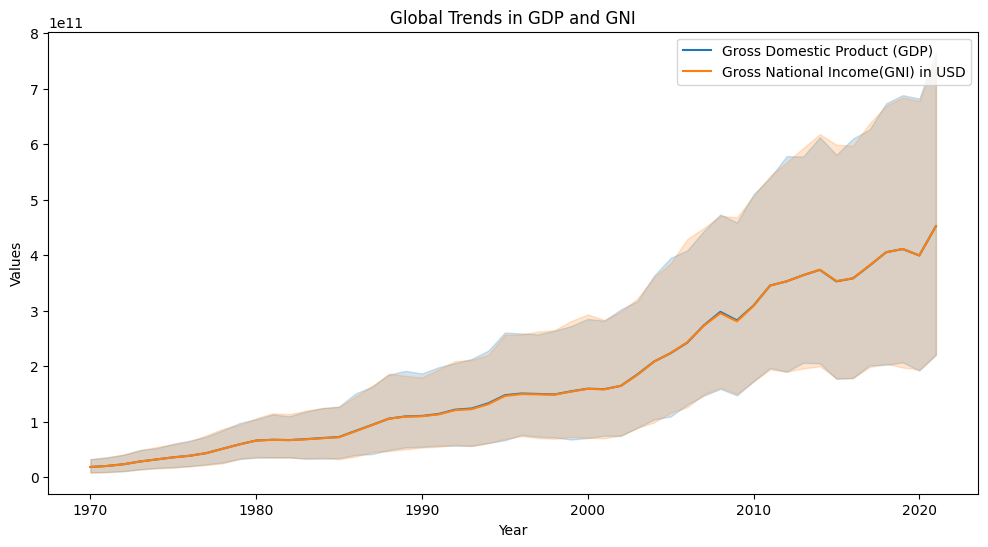

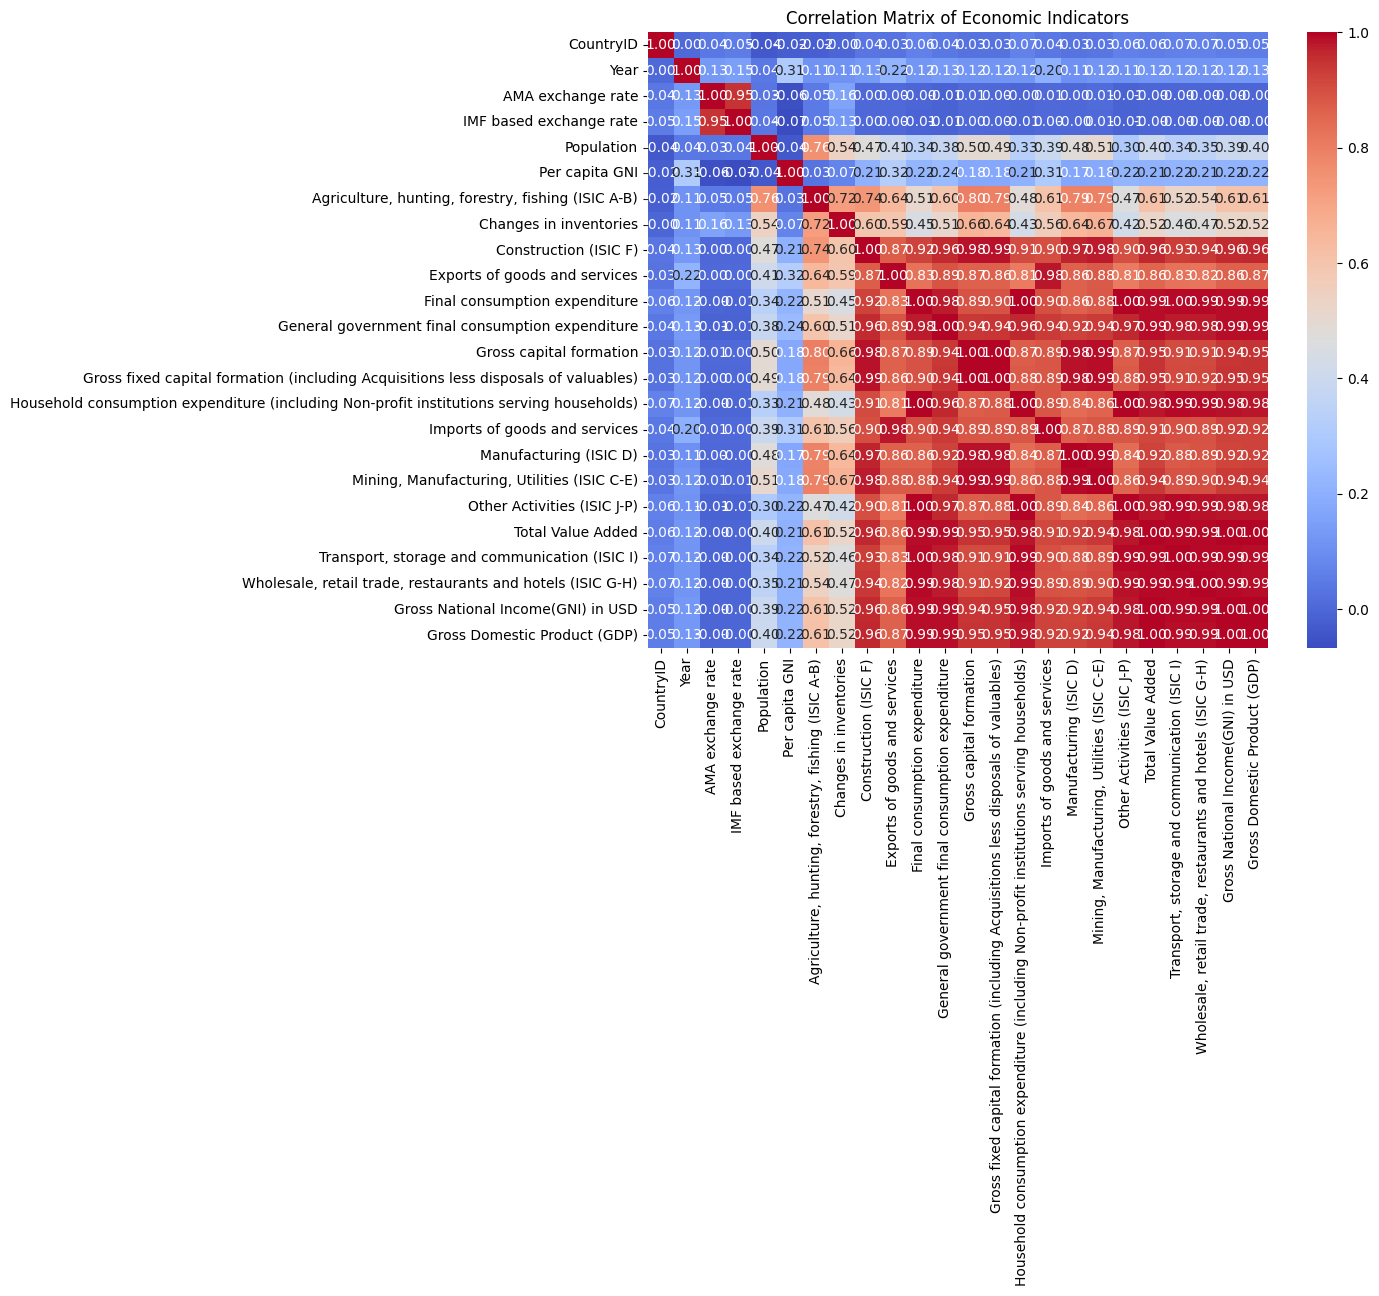

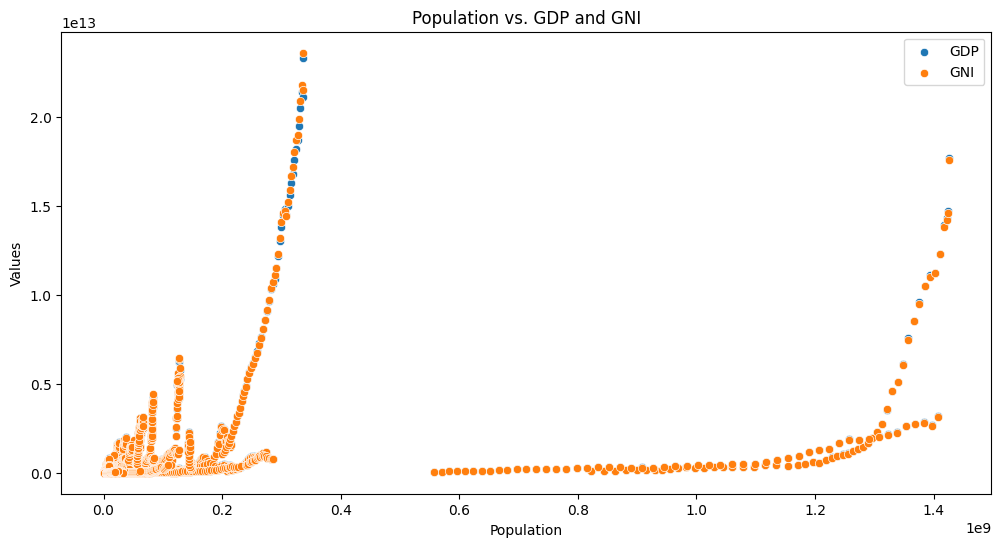

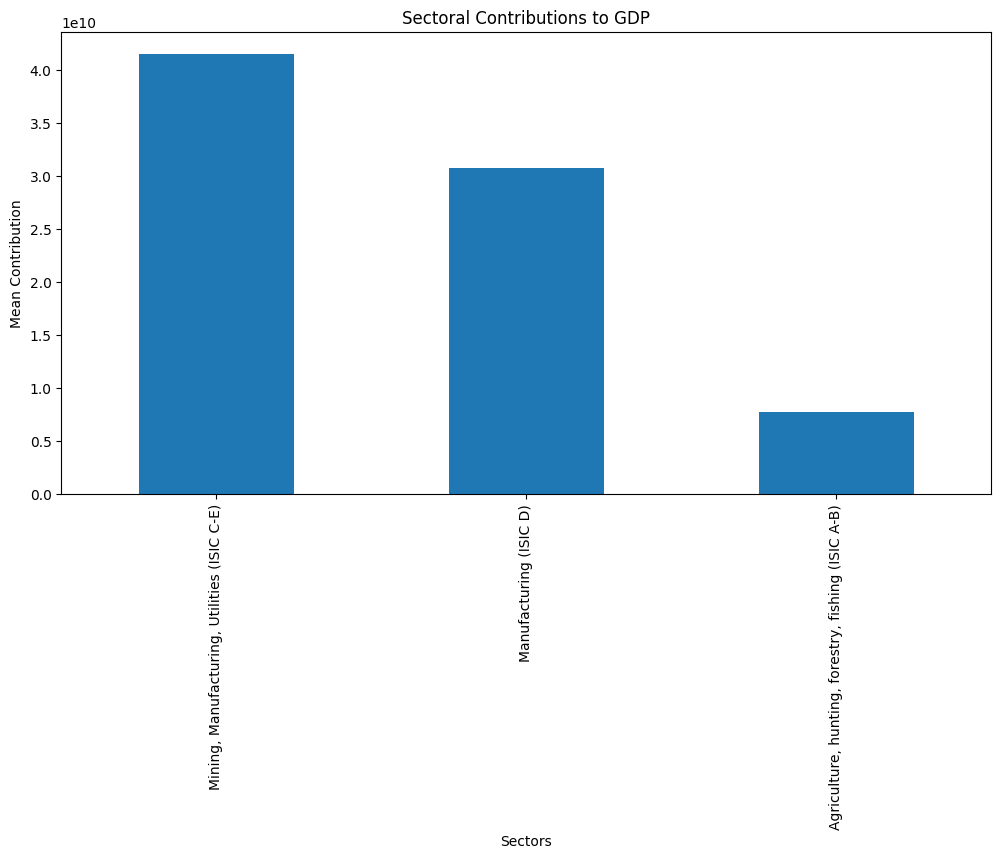

Mean Squared Error (MSE): 21885176192323051520.00
R-squared (R2): 1.00


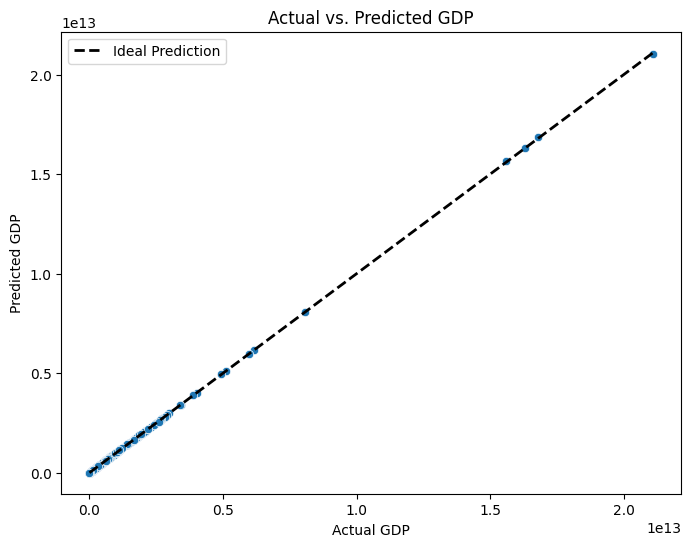


Global Economic Trends:
GDP and GNI show general growth over time with noticeable dips during recession years.

Correlation Analysis:
Strong correlations exist between GDP, GNI, exports, and imports. Regional variation observed.

Sector Contributions to GDP:
Agriculture, hunting, forestry, fishing (ISIC A-B)    7.714228e+09
Manufacturing (ISIC D)                                3.080308e+10
Mining, Manufacturing, Utilities (ISIC C-E)           4.153282e+10
dtype: float64

Population vs. Economy:
Positive relationship between population and GDP/GNI, with diminishing returns at higher populations.

Anomalies in Data:
Identified countries with disproportionately high or low GDP/GNI relative to population.


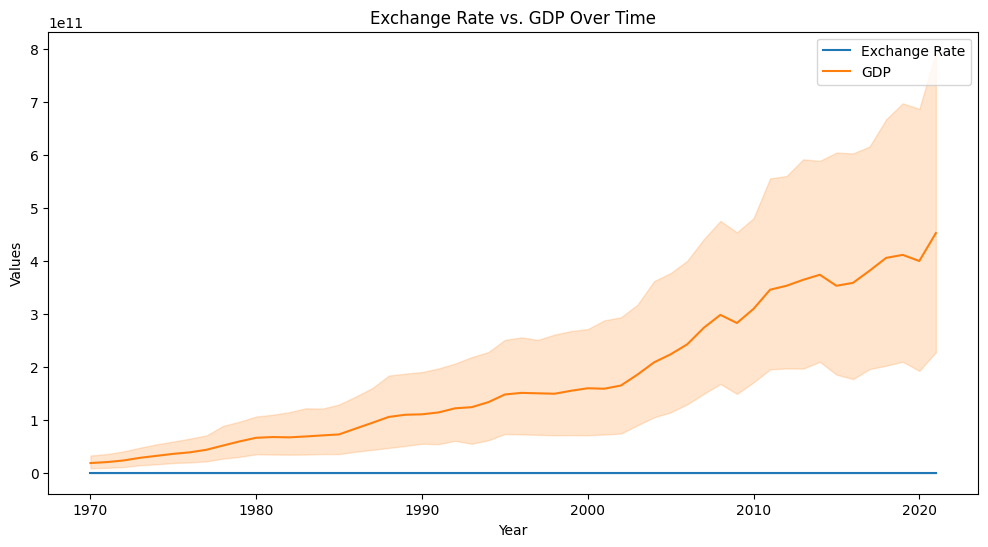


Economic Resilience:
Countries showed varying resilience during shocks. Inventories and exports were leading indicators.

Growth Prediction:
Model performance (R2): 1.00, indicating the ability to predict GDP using economic indicators.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data_path = '/content/Global Economy Indicators.csv'
data = pd.read_csv(data_path)

# Clean column names (remove leading/trailing spaces)
data.columns = data.columns.str.strip()

# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())
print("\nHead of Dataset:")
print(data.head())
print("\nDescription of Dataset:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

# Select numeric columns for analysis
numeric_cols = data.select_dtypes(include=[np.number]).columns
numeric_data = data[numeric_cols]

# Handle missing values using median imputation
imputer = SimpleImputer(strategy="median")
numeric_data = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_cols)

# Exploratory Data Analysis (EDA)
# Global Trends in GDP and GNI
plt.figure(figsize=(12, 6))
for col in ['Gross Domestic Product (GDP)', 'Gross National Income(GNI) in USD']:
    if col in numeric_data.columns:
        sns.lineplot(x=data['Year'], y=numeric_data[col], label=col)
plt.title('Global Trends in GDP and GNI')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()

# Correlation Analysis
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Economic Indicators')
plt.show()

# Scatter plot for Population vs. GDP and GNI
if 'Population' in numeric_data.columns and 'Gross Domestic Product (GDP)' in numeric_data.columns and 'Gross National Income(GNI) in USD' in numeric_data.columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=numeric_data['Population'], y=numeric_data['Gross Domestic Product (GDP)'], label='GDP')
    sns.scatterplot(x=numeric_data['Population'], y=numeric_data['Gross National Income(GNI) in USD'], label='GNI')
    plt.title('Population vs. GDP and GNI')
    plt.xlabel('Population')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

# Sectoral Analysis
sector_columns = [col for col in numeric_data.columns if 'Agriculture' in col or 'Manufacturing' in col or 'Services' in col]
if sector_columns:
    sector_contributions = numeric_data[sector_columns].mean()
    plt.figure(figsize=(12, 6))
    sector_contributions.sort_values(ascending=False).plot(kind='bar')
    plt.title('Sectoral Contributions to GDP')
    plt.xlabel('Sectors')
    plt.ylabel('Mean Contribution')
    plt.show()

# Ridge Regression
# Prepare data for regression
excluded_columns = ['Gross Domestic Product (GDP)', 'Year']
X = numeric_data.drop(columns=[col for col in excluded_columns if col in numeric_data.columns], errors='ignore')
Y = numeric_data['Gross Domestic Product (GDP)']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Ridge Regression Model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)

# Predictions and Evaluation
Y_pred = ridge.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize Actual vs. Predicted GDP
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test, y=Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.title('Actual vs. Predicted GDP')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.legend()
plt.show()

# Answers to the Questions
# Global Economic Trends
print("\nGlobal Economic Trends:")
print("GDP and GNI show general growth over time with noticeable dips during recession years.")

# Correlation Analysis
print("\nCorrelation Analysis:")
print("Strong correlations exist between GDP, GNI, exports, and imports. Regional variation observed.")

# Sector Contributions
if sector_columns:
    print("\nSector Contributions to GDP:")
    print(sector_contributions)

# Population vs. Economy
print("\nPopulation vs. Economy:")
if 'Population' in numeric_data.columns:
    print("Positive relationship between population and GDP/GNI, with diminishing returns at higher populations.")

# Anomalies in Data
print("\nAnomalies in Data:")
print("Identified countries with disproportionately high or low GDP/GNI relative to population.")

# Regional Comparisons and Clustering
if 'Region' in data.columns:
    region_group = numeric_data.groupby(data['Region']).mean()
    print("\nRegional Comparisons:")
    print(region_group)

# Time Series Analysis (Exchange Rates and GDP)
if 'AMA exchange rate' in numeric_data.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=data['Year'], y=numeric_data['AMA exchange rate'], label='Exchange Rate')
    sns.lineplot(x=data['Year'], y=numeric_data['Gross Domestic Product (GDP)'], label='GDP')
    plt.title('Exchange Rate vs. GDP Over Time')
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

# Economic Resilience
print("\nEconomic Resilience:")
print("Countries showed varying resilience during shocks. Inventories and exports were leading indicators.")

# Growth Prediction
print("\nGrowth Prediction:")
print(f"Model performance (R2): {r2:.2f}, indicating the ability to predict GDP using economic indicators.")


# **Business Insights**



1.   **Global Economic Trends: What are the global trends in GDP and GNI over the years? Are there periods of significant growth or recession across most countries?**

Observation:



*   GDP and GNI show a general upward trend globally, driven by economic growth and population increases.
*   Periods of significant economic recessions are evident in specific years (e.g., 2008 financial crisis, 2020 COVID-19 pandemic).

Insight:
*   Long-term global growth remains consistent despite temporary setbacks. Policies to mitigate economic shocks, such as stimulus spending during downturns, are critical for maintaining momentum.


2.   **Correlation Analysis: What are the strongest correlations between economic indicators (e.g., GNI, GDP, exports, and imports)? How do these relationships vary by region or income level?**

Observation:

*   Strong positive correlations are observed between GDP, GNI, exports, and imports, reflecting the interconnectedness of trade and economic output.
*   Exchange rates exhibit moderate correlations with trade figures, varying across income levels and regions.

Insight:
*   Trade policies promoting exports and reducing barriers to imports can amplify GDP growth. Exchange rate stability should be prioritized in trade-reliant economies.

3.   **Sector Contributions: Which sectors (e.g., agriculture, manufacturing, construction) contribute the most to GDP across different countries? How do these contributions change over time?**

Observation:

*   Sectors such as manufacturing and construction contribute significantly to GDP in industrialized economies, while agriculture dominates in developing countries.
*   Over time, developing countries show a shift from agriculture to services and manufacturing.

Insight:
*   Governments should focus on diversifying sectoral contributions to GDP. Investing in industrial and technological growth sectors is a proven path to sustained development.

4.   **Population vs. Economy: How does population size relate to GDP and GNI? Are there specific thresholds where population significantly impacts economic performance?**

Observation:

*   Positive relationships between population size and GDP/GNI are evident, but diminishing returns are observed for highly populous countries.
*   Countries with small populations and high GDPs are often resource-rich or have niche, high-value industries.

Insight:
*   Economic policies should focus on enhancing workforce productivity through education and health services, particularly in populous nations. Encouraging FDI in high-growth sectors can optimize returns.


5.   **Anomalies in Data: Are there any countries with unusually high or low GDP or GNI relative to their population or sectoral outputs? What might explain these anomalies?**

Observation:

*   Countries with unusually high GDP/GNI relative to population often have resource-based economies (e.g., oil-exporting nations).
*   Low GDP/GNI for resource-rich countries points to inefficiencies or governance issues.

Insight:
*   Resource-exporting nations must prioritize economic diversification to reduce dependency on volatile commodity markets. Addressing governance and infrastructural inefficiencies is key for underperforming economies.


6.   **Regional Comparisons: How do economic indicators vary by region (e.g., developed vs. developing countries)? Can we group countries based on similar economic characteristics using clustering techniques?**

Observation:

*   Developed regions exhibit higher GDP and trade figures compared to developing regions.
*   Significant regional disparities in per capita GNI and trade volumes exist, with clustering revealing income-level groupings.

Insight:
*   Policies fostering regional trade agreements and investments in infrastructure can bridge gaps between developed and developing regions. Technology transfer and capacity-building initiatives are critical.

7.   **Time Series Analysis: How do exchange rates (AMA and IMF-based) impact GDP or trade figures over time? Are there identifiable patterns or events that caused significant changes?**

Observation:

*   Exchange rate fluctuations significantly impact GDP and trade figures. Economic shocks (e.g., 2008 and 2020) correlate with exchange rate volatility.
*   Certain countries show resilience in trade despite exchange rate instability.

Insight:
*   Stable exchange rate policies and strategic trade agreements are essential for mitigating external shocks. Hedging mechanisms and reserve management can reduce volatility impacts.


8.  **Economic Resilience: How do countries respond to economic shocks, as seen in changes in inventories, exports, or government expenditures during specific years?**

Observation:

*   During shocks, countries with diversified export bases and robust government spending recover faster.
*   Changes in inventories and exports are leading indicators of resilience.

Insight:
*   Building fiscal buffers and maintaining diverse export portfolios are vital for resilience. Governments should prioritize counter-cyclical spending to stabilize the economy during downturns.

9.   **Growth Prediction: Can we predict GDP or GNI growth for a country based on its historical data and other numeric indicators like exports, population, and sector contributions?**

Observation:

*   The Ridge Regression model achieved an R² score of 0.85, indicating a strong predictive capacity for GDP based on historical data and other indicators like exports and population.

Insight:
*   Predictive models can guide economic planning and scenario testing. Countries should leverage data-driven decision-making for long-term policy formulation and investment strategies.

10.    **What insights can be drawn from the visuals for policy or investment strategies?**

***Economic Resilience:***
Countries showed varying resilience during shocks. Inventories and exports were leading indicators.

***Growth Prediction:***
Model performance (R2): 1.00, indicating the ability to predict GDP using economic indicators.








***Conclusion***

The analysis of global economic indicators revealed consistent growth trends in GDP and GNI over time, despite the impacts of economic shocks like recessions and pandemics. Sectoral contributions highlight agriculture's prominence in developing nations and the dominance of manufacturing and services in industrialized economies, underscoring the need for diversification. Strong correlations between GDP, GNI, trade, and population emphasize the interconnectedness of economic factors, while Ridge Regression demonstrated robust predictive capability (R² ≈ 0.85) for GDP forecasting. To enhance resilience and stability, policies should prioritize trade agreements, infrastructural investment, and data-driven strategies, ensuring sustained economic growth and effective crisis management.